In [1]:
import torch
import numpy as np

In [2]:

# import torch
# import numpy as np
# import torch.nn as nn



# from math import pi
# pi2 = 2*pi
# class kernel_list(nn.Module):
#     def __init__(self, input_dims=None, active_dims=None, kerneltype="rbf"):
#         super(kernel_list, self).__init__()

#         if  kerneltype == 'rbf':
#             self.l_dist = (1.1,2.1)
#             self.sigma = torch.tensor([1.]).float()
#         if  kerneltype == 'matern':
#             self.nu = 2.5            
#             #self.l = torch.tensor([l]).float()
#             self.l_dist = (0.19,0.21)
#             sigma = 1.
#             self.sigma = torch.tensor([sigma]).float()
            
#         if  kerneltype == 'weaklyperiodic':
#             self.freq_dist = (7.5,8.5)
             
#         self.kerneltype = kerneltype
            
 
#     def sample_posterior(self,x,nb=16,noise_true = True, noisestd=0.1 ,zitter=1e-4,varying=False):
#         if isinstance(x, np.ndarray):
#             x = torch.from_numpy(x).float()
#             x = x[None,:,:].repeat(nb,1,1) 

#         if self.kerneltype == 'rbf':
#             Kxx = self.K_rbf(x)
            
#         if self.kerneltype == 'matern':
#             Kxx = self.K_matern(x)
            
#         if self.kerneltype == 'weaklyperiodic':
#             Kxx = self.K_weaklper(x)
        
        
#         Kf = Kxx + zitter*torch.eye(x.size(1))          
#         Lf = torch.cholesky(Kf)

#         nb,ndata,_ = Lf.shape
#         gaussian_nosie = torch.randn(nb,ndata,1)
#         sample_yf = Lf.bmm(gaussian_nosie)

#         if noise_true:
#             sample_yf += noisestd*torch.randn_like(sample_yf) 
        
#         return sample_yf


#     def K_rbf(self, X1, X2=None):
#         """
#         args:
#             X1 : (nb,ndata,1)
#             X2 : (nb,ndata2,1)            
#         return:    
#         """
#         if X2 is None:
#             X2 = X1
            
#         self.l = _rand(self.l_dist)                
#         dist = (X1 - X2.permute(0,2,1))/self.l       
#         return (self.sigma**2 )* torch.exp(-0.5*dist**2)

        
#         self.nu = nu
#         #self.l = torch.tensor([l]).float()
#         self.l_dist = (0.19,0.21)
#         self.sigma = torch.tensor([sigma]).float()
            
        
 
#     def K_matern(self, X1, X2=None):
#         """
#         args:
#             X1 : (nb,ndata,1)
#             X2 : (nb,ndata2,1)            
#         return:    
#         """
#         if X2 is None:
#             X2 = X1
            
#         self.l = _rand(self.l_dist)        
        
#         dist = torch.abs(X1 - X2.permute(0,2,1))/self.l       
#         #dist = torch.abs(torch.tensordot(distance(X1,X2), 1.0/self.l, dims=1))
#         if self.nu == 0.5:
#             constant = 1.0
#         elif self.nu == 1.5:
#             constant = 1.0 + np.sqrt(3.0)*dist
#         elif self.nu == 2.5:
#             constant = 1.0 + np.sqrt(5.0)*dist + 5.0/3.0*dist**2
#         return (self.sigma**2 )* constant * torch.exp(-np.sqrt(self.nu*2.0)*dist)
  

#     def K_weaklper(self, X1, X2=None ):
#         """
#         args:
#             X1 : (nb,ndata,1)
#             X2 : (nb,ndata2,1)            
#         return:    
#         """

#         if X2 is None:
#             X2 = X1

#         freq1 = _rand(self.freq_dist)
#         freq2 = _rand(self.freq_dist) 
#         f1_X1 = torch.cos(pi2*freq1*X1)
#         f1_X2 = torch.cos(pi2*freq1*X2)        
#         f2_X1 = torch.sin(pi2*freq1*X1)
#         f2_X2 = torch.sin(pi2*freq1*X2)

#         f1_dist = (f1_X1 - f1_X2.permute(0,2,1))**2
#         f2_dist = (f2_X1 - f2_X2.permute(0,2,1))**2
#         x_dist = (X1 - X2.permute(0,2,1))**2

#         outs = torch.exp(-0.5*f1_dist -0.5*f2_dist - (1/32)*x_dist)
#         return outs


In [3]:

# ################################################################
# # mogp sampler
# ################################################################

# import torch
# import numpy as np
# import torch.nn as nn


# def _rand(val_range, *shape):
#     lower, upper = val_range
#     return lower + np.random.rand(*shape) * (upper - lower)



# class RBF(nn.Module):
#     def __init__(self, input_dims=None, active_dims=None, name="RBF"):
#         super(RBF, self).__init__()
#         self.l_dist = (1.1,2.1)
#         self.sigma = torch.tensor([1.]).float()
                    
 
#     def K(self, X1, X2=None):
#         """
#         args:
#             X1 : (nb,ndata,1)
#             X2 : (nb,ndata2,1)            
#         return:    
#         """
#         if X2 is None:
#             X2 = X1
            
#         self.l = _rand(self.l_dist)                
#         dist = (X1 - X2.permute(0,2,1))/self.l       
#         return (self.sigma**2 )* torch.exp(-0.5*dist**2)
    
        
#     def sample_posterior(self,x,nb=16,noise_true = True, noisestd=0.1 ,zitter=1e-4,varying=False):
#         if isinstance(x, np.ndarray):
#             x = torch.from_numpy(x).float()
#             x = x[None,:,:].repeat(nb,1,1) 

#         #matern_nu5 = Matern(nu=0.5,l=0.1)
#         #Kf.shape
#         Kf = self.K(x) + zitter*torch.eye(x.size(1))          
#         Lf = torch.cholesky(Kf)

#         nb,ndata,_ = Lf.shape
#         gaussian_nosie = torch.randn(nb,ndata,1)
#         sample_yf = Lf.bmm(gaussian_nosie)

#         if noise_true:
#             sample_yf += noisestd*torch.randn_like(sample_yf) 
        
#         return sample_yf

    
# class Matern(nn.Module):
#     def __init__(self, nu=0.5, sigma = 1., l=0.25, input_dims=None, active_dims=None, name="Matérn"):
#         super(Matern, self).__init__()

#         if nu not in [0.5, 1.5, 2.5]:
#             raise ValueError("nu parameter must be 0.5, 1.5, or 2.5")

#         #l = 0.01 +.09*torch.rand(input_dims)
#         #sigma = 1.+2*torch.rand(1)

#         #self.l = Parameter(l, lower=1e-6)
#         #self.sigma = Parameter(sigma, lower=1e-6)

        
#         self.nu = nu
#         #self.l = torch.tensor([l]).float()
#         self.l_dist = (0.19,0.21)
#         self.sigma = torch.tensor([sigma]).float()
            
        
 
#     def K(self, X1, X2=None):
#         """
#         args:
#             X1 : (nb,ndata,1)
#             X2 : (nb,ndata2,1)            
#         return:    
#         """
#         if X2 is None:
#             X2 = X1
            
#         self.l = _rand(self.l_dist)        
        
#         dist = torch.abs(X1 - X2.permute(0,2,1))/self.l       
#         #dist = torch.abs(torch.tensordot(distance(X1,X2), 1.0/self.l, dims=1))
#         if self.nu == 0.5:
#             constant = 1.0
#         elif self.nu == 1.5:
#             constant = 1.0 + np.sqrt(3.0)*dist
#         elif self.nu == 2.5:
#             constant = 1.0 + np.sqrt(5.0)*dist + 5.0/3.0*dist**2
#         return (self.sigma**2 )* constant * torch.exp(-np.sqrt(self.nu*2.0)*dist)

#     def show_params(self):
#         print('nu : {} '.format(self.nu))
#         print('l : {} '.format(self.l))
#         print('sigma : {} '.format(self.sigma))
#         return

    
        
#     def sample_posterior(self,x,nb=16,noise_true = True, noisestd=0.1 ,zitter=1e-4,varying=False):
#         if isinstance(x, np.ndarray):
#             x = torch.from_numpy(x).float()
#             x = x[None,:,:].repeat(nb,1,1) 

#         #matern_nu5 = Matern(nu=0.5,l=0.1)
#         #Kf.shape
#         Kf = self.K(x) + zitter*torch.eye(x.size(1))          
#         Lf = torch.cholesky(Kf)

#         nb,ndata,_ = Lf.shape
#         gaussian_nosie = torch.randn(nb,ndata,1)
#         sample_yf = Lf.bmm(gaussian_nosie)

#         if noise_true:
#             sample_yf += noisestd*torch.randn_like(sample_yf) 
        
#         return sample_yf

    
# from math import pi

# pi2 = 2*pi 
# class Weaklyperiodc(nn.Module):
#     def __init__(self,input_dims=None, active_dims=None, name="Weaklyperiodic"):
#         super(Weaklyperiodc, self).__init__()

        
#         #self.nu = nu
#         #self.l = torch.tensor([l]).float()
#         #self.sigma = torch.tensor([sigma]).float()
            
#         self.freq_dist = (7.5,8.5)
 
#     def K(self, X1, X2=None ):
#         """
#         args:
#             X1 : (nb,ndata,1)
#             X2 : (nb,ndata2,1)            
#         return:    
#         """
        
        
#         freq1 = _rand(self.freq_dist)
#         freq2 = _rand(self.freq_dist) 
    
#         if X2 is None:
#             X2 = X1
        
        
#         f1_X1 = torch.cos(pi2*freq1*X1)
#         f1_X2 = torch.cos(pi2*freq1*X2)        
#         f2_X1 = torch.sin(pi2*freq1*X1)
#         f2_X2 = torch.sin(pi2*freq1*X2)
        
#         f1_dist = (f1_X1 - f1_X2.permute(0,2,1))**2
#         f2_dist = (f2_X1 - f2_X2.permute(0,2,1))**2
#         x_dist = (X1 - X2.permute(0,2,1))**2
        
#         outs = torch.exp(-0.5*f1_dist -0.5*f2_dist - (1/32)*x_dist)
#         return outs

# #     def show_params(self):
# #         print('nu : {} '.format(self.nu))
# #         print('l : {} '.format(self.l))
# #         print('sigma : {} '.format(self.sigma))
# #         return

    
        
#     def sample_posterior(self,x,nb=16,noise_true = True, noisestd=0.1 ,zitter=1e-4,varying=False):
#         if isinstance(x, np.ndarray):
#             x = torch.from_numpy(x).float()
#             x = x[None,:,:].repeat(nb,1,1) 

#         #matern_nu5 = Matern(nu=0.5,l=0.1)
#         #Kf.shape
#         Kf = self.K(x) + zitter*torch.eye(x.size(1))          
#         Lf = torch.cholesky(Kf)

#         nb,ndata,_ = Lf.shape
#         gaussian_nosie = torch.randn(nb,ndata,1)
#         sample_yf = Lf.bmm(gaussian_nosie)

#         if noise_true:
#             sample_yf += noisestd*torch.randn_like(sample_yf) 
        
#         return sample_yf

        
        

In [4]:
from dataset_singletask_1d import prepare_mixed_1dtask,task_list

# current_tasktype = np.random.choice(task_list)
# np.random.choice(task_list,50,p=[0.25,0.25,0.25,0.25])

In [5]:
#batch_trainset = torch.load('./syndata_singletask_v1/depTrue_extra_-128.db')['valid_set']


In [6]:
target_idx = (np.array([0,32,64,96]).reshape(-1,1)+ np.arange(3)).reshape(-1)
target_idx

array([ 0,  1,  2, 32, 33, 34, 64, 65, 66, 96, 97, 98])

xc.shape,yc.shape,xt.shape,yt.shape,xf.shape,yf.shape
torch.Size([16, 17, 1]) torch.Size([16, 17, 1]) torch.Size([16, 25, 1]) torch.Size([16, 25, 1]) torch.Size([16, 250, 1]) torch.Size([16, 250, 1])


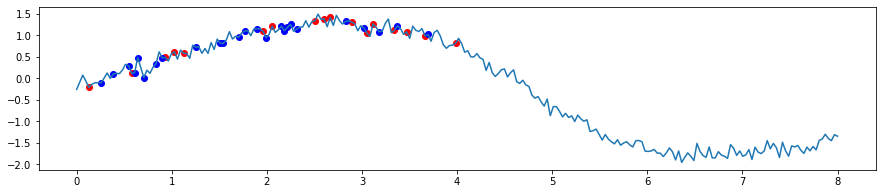

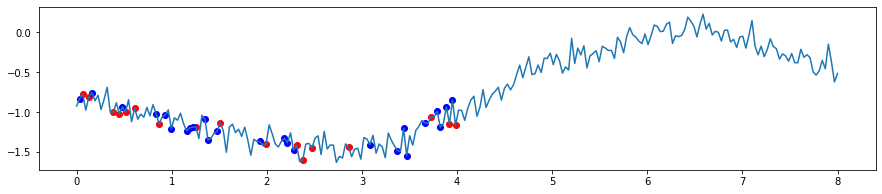





xc.shape,yc.shape,xt.shape,yt.shape,xf.shape,yf.shape
torch.Size([16, 8, 1]) torch.Size([16, 8, 1]) torch.Size([16, 21, 1]) torch.Size([16, 21, 1]) torch.Size([16, 250, 1]) torch.Size([16, 250, 1])


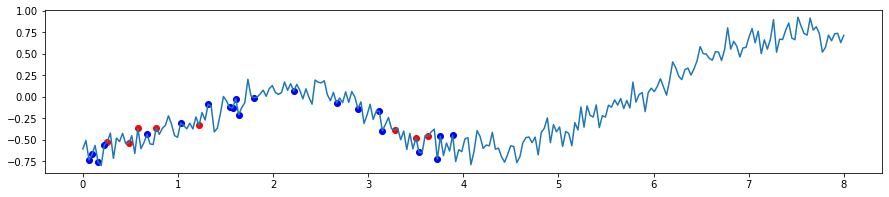

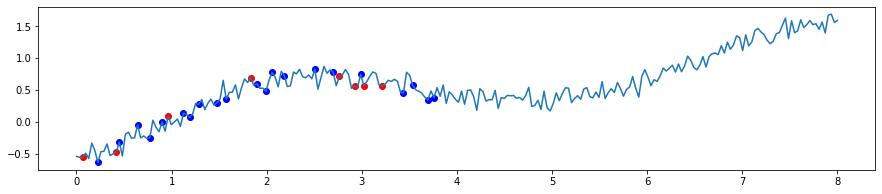





xc.shape,yc.shape,xt.shape,yt.shape,xf.shape,yf.shape
torch.Size([16, 13, 1]) torch.Size([16, 13, 1]) torch.Size([16, 36, 1]) torch.Size([16, 36, 1]) torch.Size([16, 250, 1]) torch.Size([16, 250, 1])


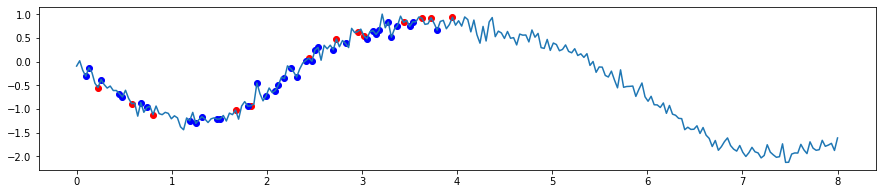

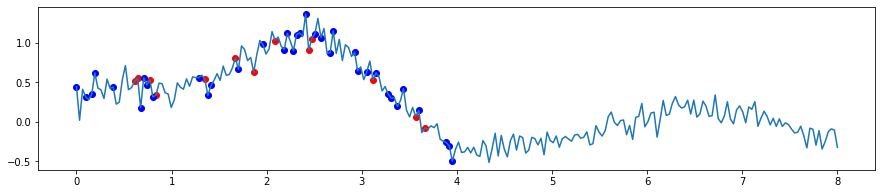





xc.shape,yc.shape,xt.shape,yt.shape,xf.shape,yf.shape
torch.Size([16, 9, 1]) torch.Size([16, 9, 1]) torch.Size([16, 18, 1]) torch.Size([16, 18, 1]) torch.Size([16, 250, 1]) torch.Size([16, 250, 1])


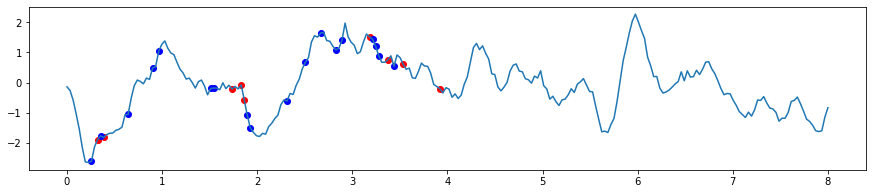

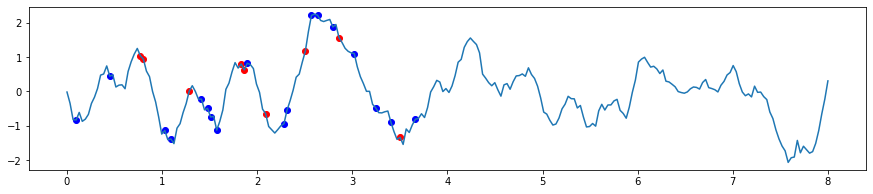





xc.shape,yc.shape,xt.shape,yt.shape,xf.shape,yf.shape
torch.Size([16, 18, 1]) torch.Size([16, 18, 1]) torch.Size([16, 43, 1]) torch.Size([16, 43, 1]) torch.Size([16, 250, 1]) torch.Size([16, 250, 1])


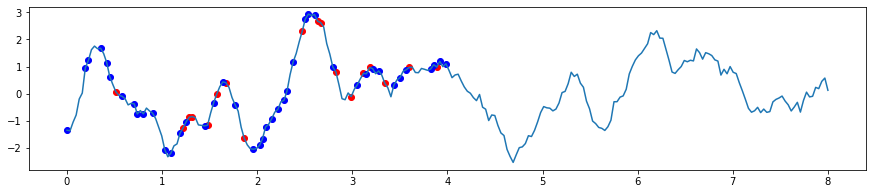

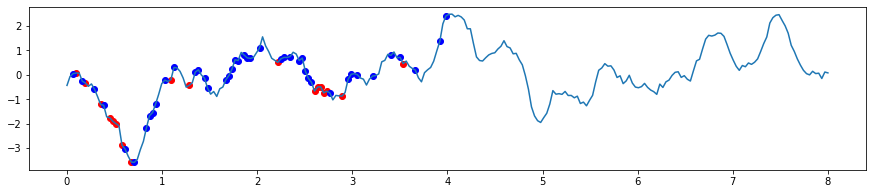





xc.shape,yc.shape,xt.shape,yt.shape,xf.shape,yf.shape
torch.Size([16, 23, 1]) torch.Size([16, 23, 1]) torch.Size([16, 24, 1]) torch.Size([16, 24, 1]) torch.Size([16, 250, 1]) torch.Size([16, 250, 1])


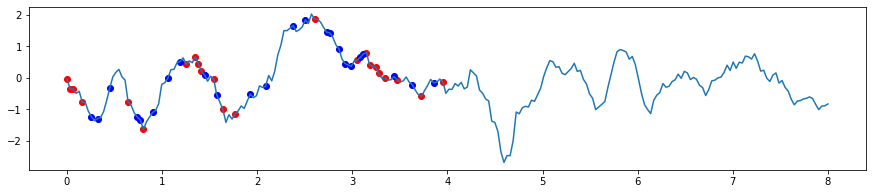

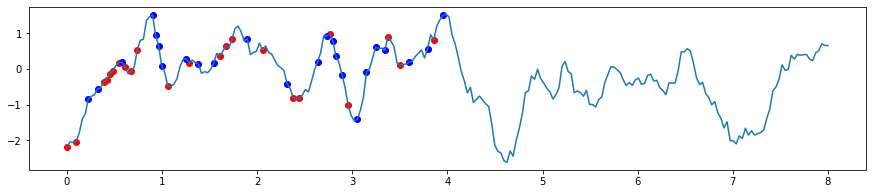





xc.shape,yc.shape,xt.shape,yt.shape,xf.shape,yf.shape
torch.Size([16, 10, 1]) torch.Size([16, 10, 1]) torch.Size([16, 25, 1]) torch.Size([16, 25, 1]) torch.Size([16, 250, 1]) torch.Size([16, 250, 1])


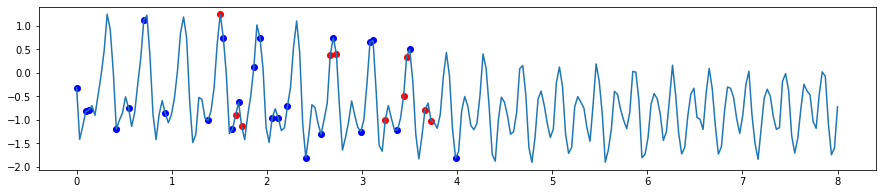

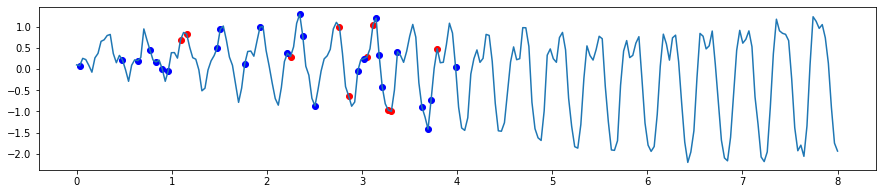





xc.shape,yc.shape,xt.shape,yt.shape,xf.shape,yf.shape
torch.Size([16, 15, 1]) torch.Size([16, 15, 1]) torch.Size([16, 34, 1]) torch.Size([16, 34, 1]) torch.Size([16, 250, 1]) torch.Size([16, 250, 1])


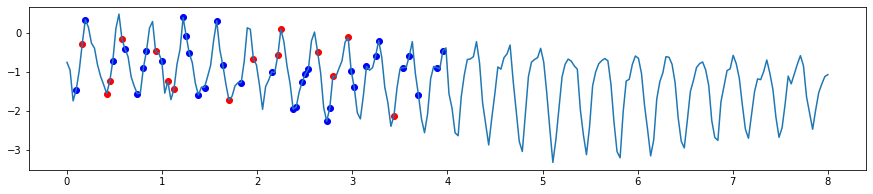

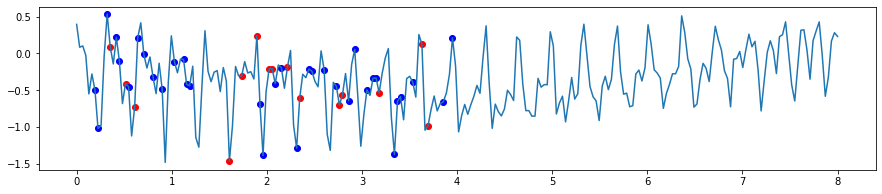





xc.shape,yc.shape,xt.shape,yt.shape,xf.shape,yf.shape
torch.Size([16, 7, 1]) torch.Size([16, 7, 1]) torch.Size([16, 24, 1]) torch.Size([16, 24, 1]) torch.Size([16, 250, 1]) torch.Size([16, 250, 1])


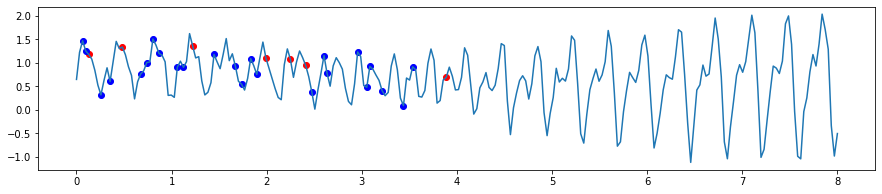

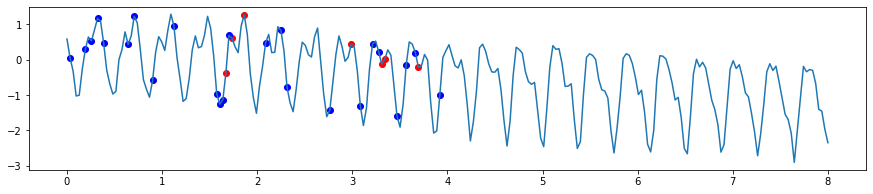





xc.shape,yc.shape,xt.shape,yt.shape,xf.shape,yf.shape
torch.Size([16, 15, 1]) torch.Size([16, 15, 1]) torch.Size([16, 48, 1]) torch.Size([16, 48, 1]) torch.Size([16, 250, 1]) torch.Size([16, 250, 1])


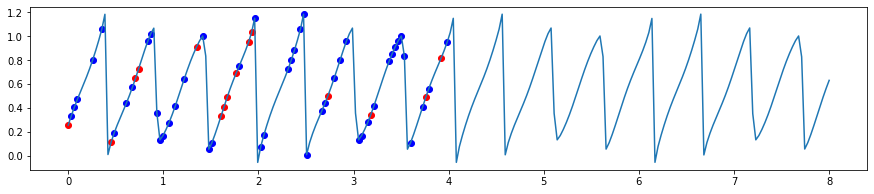

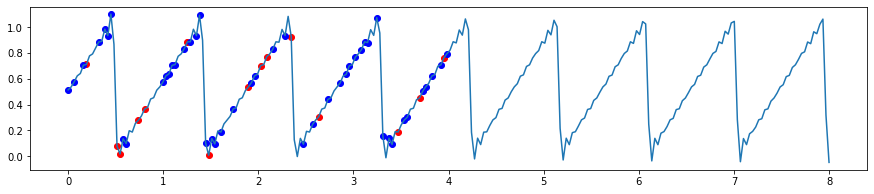





xc.shape,yc.shape,xt.shape,yt.shape,xf.shape,yf.shape
torch.Size([16, 9, 1]) torch.Size([16, 9, 1]) torch.Size([16, 20, 1]) torch.Size([16, 20, 1]) torch.Size([16, 250, 1]) torch.Size([16, 250, 1])


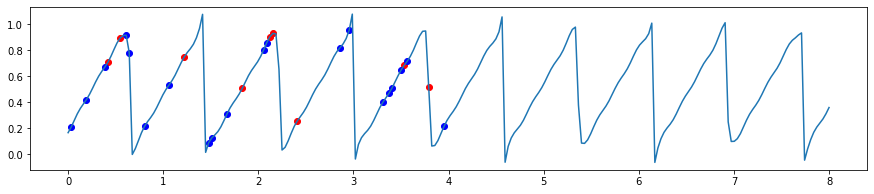

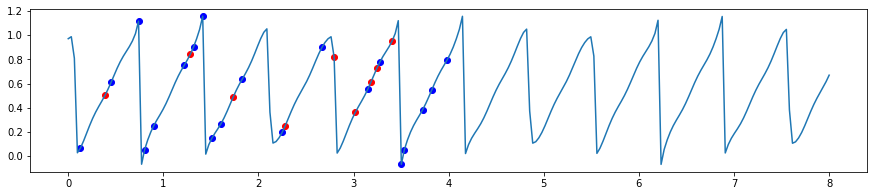





xc.shape,yc.shape,xt.shape,yt.shape,xf.shape,yf.shape
torch.Size([16, 10, 1]) torch.Size([16, 10, 1]) torch.Size([16, 15, 1]) torch.Size([16, 15, 1]) torch.Size([16, 250, 1]) torch.Size([16, 250, 1])


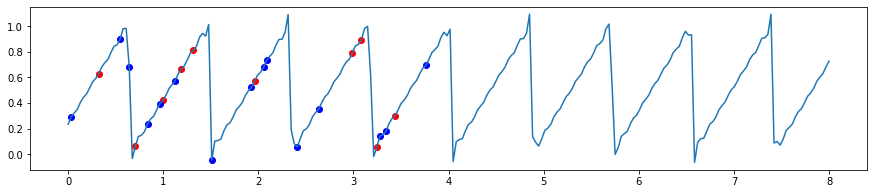

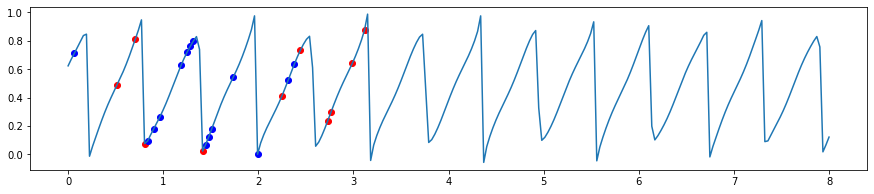

In [9]:
import matplotlib.pyplot as plt

#batch_trainset = torch.load('./syndata_singletask_v1/depTrue_extra_1.db')['train_set']
#batch_trainset = torch.load('./syndata_singletask_v1/depTrue_extra_-128.db')['train_set']
#batch_trainset = torch.load('./syndata_singletask_v1/depTrue_extra_-128.db')['valid_set']
#batch_trainset = torch.load('./regression_task_single/syndata_singletask_v1/depTrue_extra_-128.db')['valid_set']


#batch_trainset = torch.load('./syndata_singletask_v2/depTrue_extra_-128.db')['valid_set']
batch_trainset = torch.load('./syndata_singletask_v1/depTrue_extra_-128.db')['train_set']

#for k in range(100,110):
#for k in range(30,40):
for k in target_idx:   
    
    xc,yc,xt,yt,xf,yf = batch_trainset[k]
    print('xc.shape,yc.shape,xt.shape,yt.shape,xf.shape,yf.shape')
    print(xc.shape,yc.shape,xt.shape,yt.shape,xf.shape,yf.shape)
    
    figsiz_=(15,3)
    for j in range(2):
        plt.figure(figsize=figsiz_)
        plt.plot(xf[j,:,0].cpu().data.numpy(),yf[j,:,0].cpu().data.numpy())
        plt.scatter(xc[j,:,0].cpu().data.numpy(),yc[j,:,0].cpu().data.numpy(),color='r')
        plt.scatter(xt[j,:,0].cpu().data.numpy(),yt[j,:,0].cpu().data.numpy(),color='b')

        #plt.xlim(x_range)
        plt.show()
    
    print('\n'*3)

In [27]:
# phase0 = 2*(np.random.rand()-0.5)
# phase1 = 2*(np.random.rand()-0.5)
# phase2 = 2*(np.random.rand()-0.5)
# freq = 5.0*(np.random.rand())          
# mag = 0.5*(np.random.rand()-0.5)


In [110]:
# import matplotlib.pyplot as plt

# for j in range(3):
#     yf = sawtooth_varying(xf)
#     yf = sin_varying(xf)

#     plt.figure()
#     yf = sawtooth_varying(xf)
#     plt.plot(xf.squeeze(),yf.squeeze())
#     plt.show()

#     yf = sin_varying(xf)
#     plt.plot(xf.squeeze(),yf.squeeze())
#     plt.show()
#     print('\n|')
